In [1]:
import importlib
import datetime
import mapplotting
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import cartopy
import pandas
import xarray
import matplotlib
from GliderTools import glidertools as gt
import matplotlib.dates as mdates
import string
import bathy_maps.bathyutils as bathyutils
import dictionaries
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from shapely.geometry.polygon import LinearRing
import cartopy.crs as ccrs
import cmocean
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib.patheffects as pe

towers = [
dict(name='Norunda', short='NOR', lat=60.0864, lon=17.4794, tlat=60.0864, tlon=17.4794-1.2),
dict(name='Hyltemossa', short='HTM', lat=56.09763, lon=13.41897, tlat=56.09763, tlon=13.41897+0.1),
dict(name='Birkenes', short='BIR', lat=58.3886, lon=8.2519, tlat=58.3886, tlon=8.2519-0.8),
dict(name='Utö-Baltic Sea', short='UTO', lat=59.7839, lon=21.3672, tlat=59.7839, tlon=21.3672+0.1),
# dict(name='Zeppelin ZEP', short='ZEP', lat=78.9072, lon=11.8867, tlat=78.9072, tlon=11.8867),
dict(name='NILU, Kjeller, Norway', short='NILU', lat=59.9753, lon=11.0527, tlat=59.9753, tlon=11.0527+0.1)]

def create_1a(fig, ax):
    import matplotlib.patheffects as pe
    import geopandas as gp
    #import cartopy.crs as ccrs
    
    def create_map_figure(fig, ax, zoomin=False, cbar=False):
        pc, ax, gl = mapplotting.plot_concentrations_map(fig, ax, bathy=False, 
                                                         zoomin=zoomin, 
                                                         cbar=False,
                                                         gtrajectory=True,
                                                         biglabels=False)
        return fig, ax, pc, gl

    importlib.reload(mapplotting)
    df_helcom = gp.read_file("../data/input/_ags_HELCOM_subbasins_2022_level21/HELCOM_subbasins_2022_level2.shp")
    secondround = dict(showmodel=True, zoomin=False)

    # This is just a simple figure for the presentation for EGU
    fig, ax, pc, gl = create_map_figure(fig, ax, zoomin=False)
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.xlabel_style = {'color':'k', 'rotation':0}
    for tower in towers:
        ax.scatter(tower['lon'], tower['lat'], marker="^",
                   transform=ccrs.PlateCarree(),
                   zorder=200,
                   color='white', edgecolors='k')
        if tower['short']=='UTO':
            color='white'
        else:
            color='k'
        ax.text(tower['tlon'], tower['tlat'], s=tower['short'],
                           transform=ccrs.PlateCarree(),
                           zorder=200, color=color)
                           #color='white')


    
    mapplotting.plot_pipelines(ax)
    
    
    # mapplotting.plot_helcom(ax, df_helcom)

    #df_ferry = pandas.read_csv(
    #'../data/input/IOW_Ferry_box/IOW_SOOP_Finnmaid_CH4_data_Rehder_Bittig_Glockzin_for_VOTO/'
    #'IOW_SOOP_Finnmaid_CH4_data_Rehder_Bittig_Glockzin_for_DLR.txt')
    #df_ferry['time'] = pandas.to_datetime(df_ferry['MatlabTime']-719529, unit='D')
    # df_ferry = df_ferry.resample('H', on='time').apply(np.nanmean)#mean()
    #df_ferry = df_ferry.dropna()
    #ax.plot(df_ferry.Lon[6000:8000], 
    #        df_ferry.Lat[6000:8000], 
    #        transform=ccrs.PlateCarree(),
    #        color='red')
    
    #ax.plot(df_ferry.Lon[6000:20000], 
    #        df_ferry.Lat[6000:20000], 
    #        transform=ccrs.PlateCarree(),
    #        color='blue')

    # # Achtung! Vmin, Vmax and the np.logspace levels have to fit together.
    vmin=1e-9
    vmax=1e-5

    legend_elements = [Line2D([0], [0], color='w', ls='-', 
                      path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()],
                      lw=2, label='Glider observation transect'),
                      Line2D([0], [0], marker='X', color='w',
                        markerfacecolor='orange', markersize=10, label='Methane leak location'),
                      Line2D([0], [0], marker='^', markerfacecolor='w', color='white',
                        markeredgecolor='k', markersize=10, label='ICOS station/monitoring location'),
                      Line2D([0], [0], color='lightgrey', 
                             lw=4, label='Nordstream pipeline (approx)'),
                      Line2D([0], [0], color='red', 
                             lw=1.5, label='Ferry box transect'),
                      Line2D([0], [0], color='k', 
                         lw=1.5, label='HELiPOD track'),
                      Line2D([0], [0], marker='X', color='w',
                        markerfacecolor='k', markersize=8, label='Nordex CTD'),
                      ]
    ax.legend(handles=legend_elements, loc='lower right', framealpha=1.,
              fontsize=10, handlelength=1.5).set_zorder(100)
    
    return ax
    # plt.show()

/home/coffee/micromamba/envs/analysis/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/coffee/micromamba/envs/analysis/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '


Found tiles [PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/D5_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/C7_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/D6_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/C5_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/C6_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/D7_2020.nc')]
Found 3 tiles with relevant data: [PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/D5_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/D6_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/D7_2020.nc')]
data in one row, patching lon


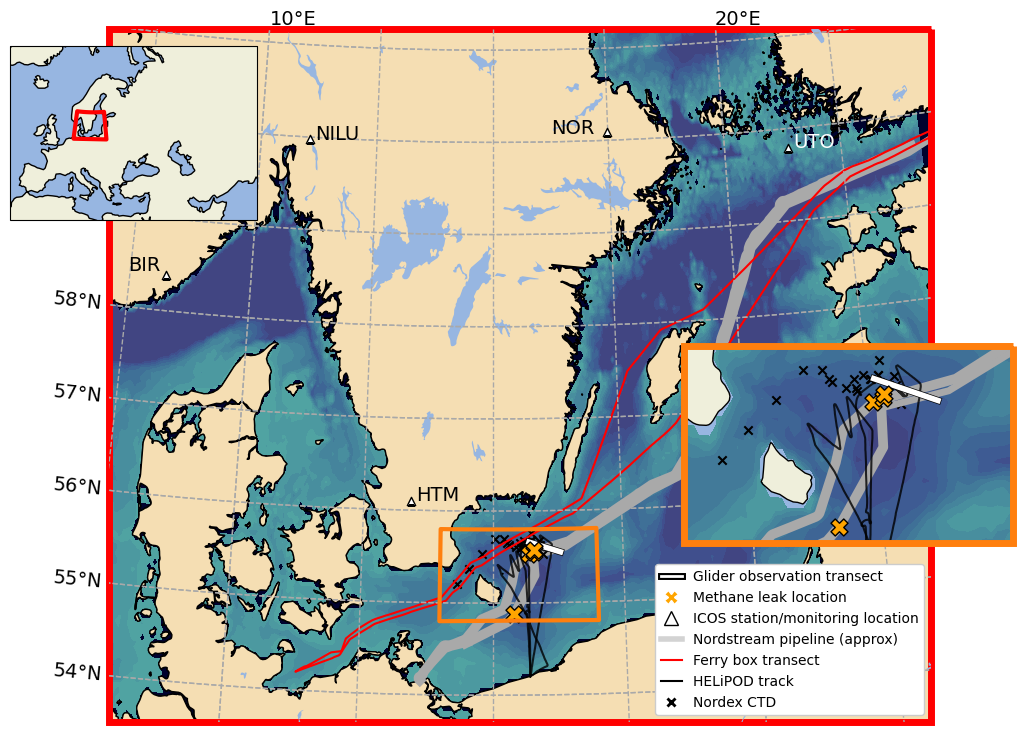

In [3]:
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import importlib
importlib.reload(dictionaries)
dictionaries.leak4['lon'] = dictionaries.leak4['lon']+0.02
dictionaries.leak4['lat'] = dictionaries.leak4['lat']+0.02

S_lim = 53.5
N_lim = 59
W_lim = 10
E_lim = 20

dictionaries.S_lim = 53.5
dictionaries.N_lim = 61.
dictionaries.W_lim = 8
dictionaries.E_lim = 23

pc = cartopy.crs.PlateCarree()
coord = cartopy.crs.AzimuthalEquidistant(
    central_longitude=np.mean((W_lim, E_lim)),
    central_latitude=np.mean((S_lim, N_lim)))

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=[17,9])
#gs = fig.add_gridspec(nrows=10, ncols=10, hspace=0.5, wspace=1)
ax0 = fig.add_subplot(projection=coord)
ax0 = create_1a(fig, ax0)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

emodnet_path = "/home/coffee/VOTO/data/bathymetry/emodnet_baltic/"
extent = (dictionaries.S_lim, dictionaries.N_lim, dictionaries.W_lim-1, dictionaries.E_lim+1)
ds_bathy = bathyutils.emod_subset(extent, emodnet_path)

stride = 50
lon = ds_bathy.lon[::stride]
lat = ds_bathy.lat[::stride]
bathy = ds_bathy.elevation[::stride, ::stride].values
ds_bathy.close()
# set all land to 0 m, we only want bathymetry
bathy[bathy>0] = 0
bathy = bathy.clip(-100)

levels = np.arange(-100, 10, 10)
bathy_c = ax0.contourf(lon, lat, bathy, transform=pc,
                    cmap=truncate_colormap(cmocean.cm.deep_r, 0.2, 0.6),
                    alpha=1, zorder=0,
                    levels=levels,
                    linestyles='-')

feature = cartopy.feature.NaturalEarthFeature(name='land', category='physical',
                                       scale='10m', edgecolor='black', facecolor='wheat',
                                       zorder=0)

#feature = cartopy.feature.NaturalEarthFeature(name='lakes', category='physical',
#                                       scale='10m', edgecolor='black', facecolor='blue',
#                                       zorder=11)

ax0.add_feature(feature)

df_ferrytrack = pandas.read_csv('../data/input/IOW_Ferry_box/typical_track.tab', delimiter='\t', skiprows=30)
ax0.plot(df_ferrytrack['Longitude'][0:2900], df_ferrytrack['Latitude'][0:2900], color='red', transform=pc)
#plt.plot(df_ferrytrack['Longitude'], df_ferrytrack['Latitude'], transform=pc, zorder=101)
#fig.colorbar(bathy_c,ax=ax0,
#    orientation='horizontal',
#    label='Bathymetry (m)',
#    shrink=0.6,
    #pad=0.1,
    #aspect=40,
#    extend='min')

#axins = inset_axes(ax0, width="40%", height="40%", loc="upper right", 
#                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
#                   axes_kwargs=dict(map_projection=cartopy.crs.PlateCarree()))
#axins.add_feature(cartopy.feature.COASTLINE)

# inset location relative to main plot (ax) in normalized units
""" globe
inset_x = 1
inset_y = 1
inset_size = 0.2

ax2 = plt.axes([0, 0, 1, 1], projection=ccrs.Orthographic(
    central_latitude=(latmin + latmax) / 2,
    central_longitude=(lonmin + lonmax) / 2))
ax2.set_global()
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.COASTLINE)

ip = InsetPosition(ax, [inset_x - inset_size / 2,
                        inset_y - inset_size / 2,
                        inset_size,
                        inset_size])
ax2.set_axes_locator(ip)

nvert = 100
lons = np.r_[np.linspace(lonmin, lonmin, nvert),
             np.linspace(lonmin, lonmax, nvert),
             np.linspace(lonmax, lonmax, nvert)].tolist()
lats = np.r_[np.linspace(latmin, latmax, nvert),
             np.linspace(latmax, latmax, nvert),
             np.linspace(latmax, latmin, nvert)].tolist()

ring = LinearRing(list(zip(lons, lats)))
ax2.add_geometries([ring], ccrs.PlateCarree(),
                   facecolor='none', edgecolor='red', linewidth=0.75)
"""

# add ring into main map
ax0.add_feature(feature)
ax0.set_extent([
dictionaries.W_lim,
dictionaries.E_lim,
dictionaries.S_lim,
dictionaries.N_lim,
])

W_lim_detail = 14
E_lim_detail = 17
S_lim_detail = 54.8 
N_lim_detail = 55.8
nvert = 100
lons = np.r_[np.linspace(W_lim_detail, W_lim_detail, nvert),
             np.linspace(W_lim_detail, E_lim_detail, nvert),
             np.linspace(E_lim_detail, E_lim_detail, nvert)].tolist()
lats = np.r_[np.linspace(S_lim_detail, N_lim_detail, nvert),
             np.linspace(N_lim_detail, N_lim_detail, nvert),
             np.linspace(N_lim_detail, S_lim_detail, nvert)].tolist()

ring = LinearRing(list(zip(lons, lats)))
ax0.add_geometries([ring], ccrs.PlateCarree(),
                   facecolor='none', edgecolor='tab:orange', linewidth=3, zorder=100)



# EUROPE INSET
inset_x = 1
inset_y = 1
inset_size = 0.2

ax2 = plt.axes([0, 0, 1, 1], projection=ccrs.Orthographic(
    central_latitude=58,
    central_longitude=17))
ax2.set_global()
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.COASTLINE)

ip = InsetPosition(ax0, [-0.12,0.70,0.3,0.3])
ax2.set_axes_locator(ip)

nvert = 100
lons = np.r_[np.linspace(dictionaries.W_lim, dictionaries.W_lim, nvert),
             np.linspace(dictionaries.W_lim, dictionaries.E_lim, nvert),
             np.linspace(dictionaries.E_lim, dictionaries.E_lim, nvert)].tolist()
lats = np.r_[np.linspace(dictionaries.S_lim, dictionaries.N_lim, nvert),
             np.linspace(dictionaries.N_lim, dictionaries.N_lim, nvert),
             np.linspace(dictionaries.N_lim, dictionaries.S_lim, nvert)].tolist()

ring = LinearRing(list(zip(lons, lats)))
ax2.add_geometries([ring], ccrs.PlateCarree(),
                   facecolor='none', edgecolor='red', linewidth=3, zorder=100)
ax2.set_extent([-10, 80, 30, 70], crs=ccrs.PlateCarree())
# END EUROPE INSET

# LEAKS DETAIL INSET
inset_x = 1
inset_y = 1
inset_size = 0.2

ax3 = plt.axes([0, 0, 1, 1], projection=ccrs.Orthographic(
    central_latitude=58,
    central_longitude=17))
ax3.set_global()
ax3.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.OCEAN)
ax3.add_feature(cfeature.COASTLINE)

ip = InsetPosition(ax0, [0.7,0.2,0.4,0.4])
ax3.set_axes_locator(ip)

nvert = 100
lons = np.r_[np.linspace(dictionaries.W_lim, dictionaries.W_lim, nvert),
             np.linspace(dictionaries.W_lim, dictionaries.E_lim, nvert),
             np.linspace(dictionaries.E_lim, dictionaries.E_lim, nvert)].tolist()
lats = np.r_[np.linspace(dictionaries.S_lim, dictionaries.N_lim, nvert),
             np.linspace(dictionaries.N_lim, dictionaries.N_lim, nvert),
             np.linspace(dictionaries.N_lim, dictionaries.S_lim, nvert)].tolist()

ring = LinearRing(list(zip(lons, lats)))
ax3.add_geometries([ring], ccrs.PlateCarree(),
                   facecolor='none', edgecolor='red', linewidth=3, zorder=100)
ax3.set_extent([W_lim_detail,
E_lim_detail,
S_lim_detail, 
N_lim_detail,], crs=ccrs.PlateCarree())

bathy_c = ax3.contourf(lon, lat, bathy, transform=pc,
                    cmap=truncate_colormap(cmocean.cm.deep_r, 0.2, 0.6),
                    alpha=1, zorder=0,
                    levels=levels,
                    linestyles='-')

nordex = pandas.read_excel('../data/input/Skagerrak_sampling/location NORDEX stn 1-20.xlsx') #Skgrk
nordex = nordex[['Latitude', 'Longitude', 'Station', 'Cast']]
HELiPOD1 = pandas.read_csv('../data/input/HELiPOD/dlr_tubs_flight1_locations.csv')
HELiPOD2 = pandas.read_csv('../data/input/HELiPOD/dlr_tubs_flight2_locations.csv')
detailcolor = 'k'
ax3.scatter(
    nordex.groupby('Station').mean()['Longitude'], 
    nordex.groupby('Station').mean()['Latitude'], 
    marker='x', color=detailcolor, transform=pc)
ax3.plot(HELiPOD1.Lon, HELiPOD1.Lat, color=detailcolor, transform=pc, alpha=0.8)
ax3.plot(HELiPOD2.Lon, HELiPOD2.Lat, color=detailcolor, transform=pc, alpha=0.8)
ax0.scatter(
    nordex.groupby('Station').mean()['Longitude'], 
    nordex.groupby('Station').mean()['Latitude'], 
    marker='x', color=detailcolor, transform=pc)
ax0.plot(HELiPOD1.Lon, HELiPOD1.Lat, color=detailcolor, transform=pc, alpha=0.8)
ax0.plot(HELiPOD2.Lon, HELiPOD2.Lat, color=detailcolor, transform=pc, alpha=0.8)

mapplotting.plot_pipelines(ax3)

leak1 = dictionaries.leak1
leak2 = dictionaries.leak2
leak3 = dictionaries.leak3
leak4 = dictionaries.leak4

for leak in [leak1, leak2, leak3, leak4]:
    ax3.scatter(leak['lon'], leak['lat'], color='orange', transform=pc, s=150, zorder=20,
                edgecolor='k', marker="X")

ax3.plot([15.7,16.3], [55.66, 55.55],
    transform=pc,
    color='white',
    #zorder=5,
    lw=4,
    path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()],
    ls='-')
# END LEAKS DETAIL INSET
    
ax0.tick_params(color='red', labelcolor='red')
for spine in ax0.spines.values():
    spine.set_edgecolor('red')
    spine.set_linewidth(5)

ax3.tick_params(color='tab:orange', labelcolor='red')
for spine in ax3.spines.values():
    spine.set_edgecolor('tab:orange')
    spine.set_linewidth(5)


plt.savefig('../figures/synthesis_map.png', dpi=300)
plt.show()


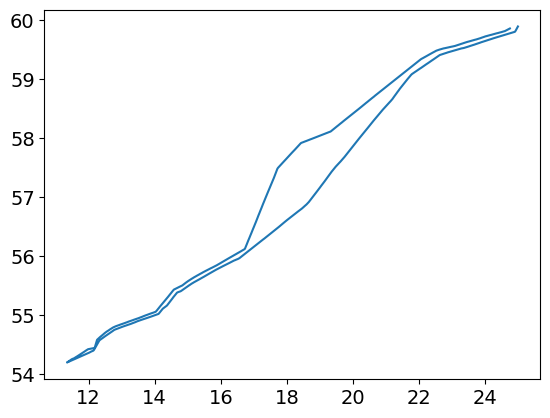

In [4]:
plt.plot(df_ferrytrack['Longitude'][0:2900], df_ferrytrack['Latitude'][0:2900], zorder=101)

Text(0.5, 0.5, '🗼')

/home/coffee/micromamba/envs/analysis/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 128508 (\N{TOKYO TOWER}) missing from current font.
  func(*args, **kwargs)
/home/coffee/micromamba/envs/analysis/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128508 (\N{TOKYO TOWER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


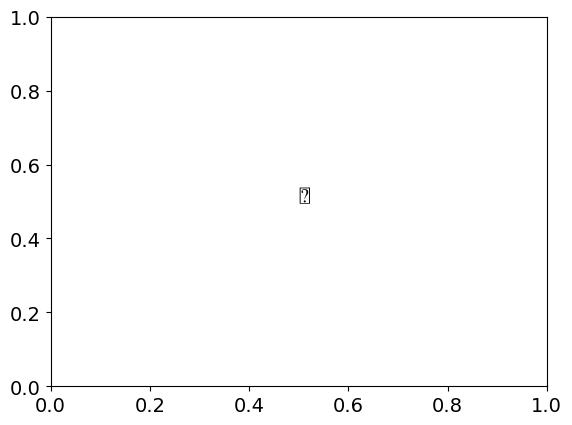

In [5]:
#u'\U0001f5fc'  '\U0001f5fc'

import matplotlib.font_manager as mfm

font_path = '/usr/share/fonts/truetype/freefont/FreeSerif.ttf'
prop = mfm.FontProperties(fname=font_path) # find this font
plt.text(x=0.5, y=0.5, s='\U0001f5fc', fontproperties=prop)# marker='\U0001f5fc')

NameError: name 'ax' is not defined

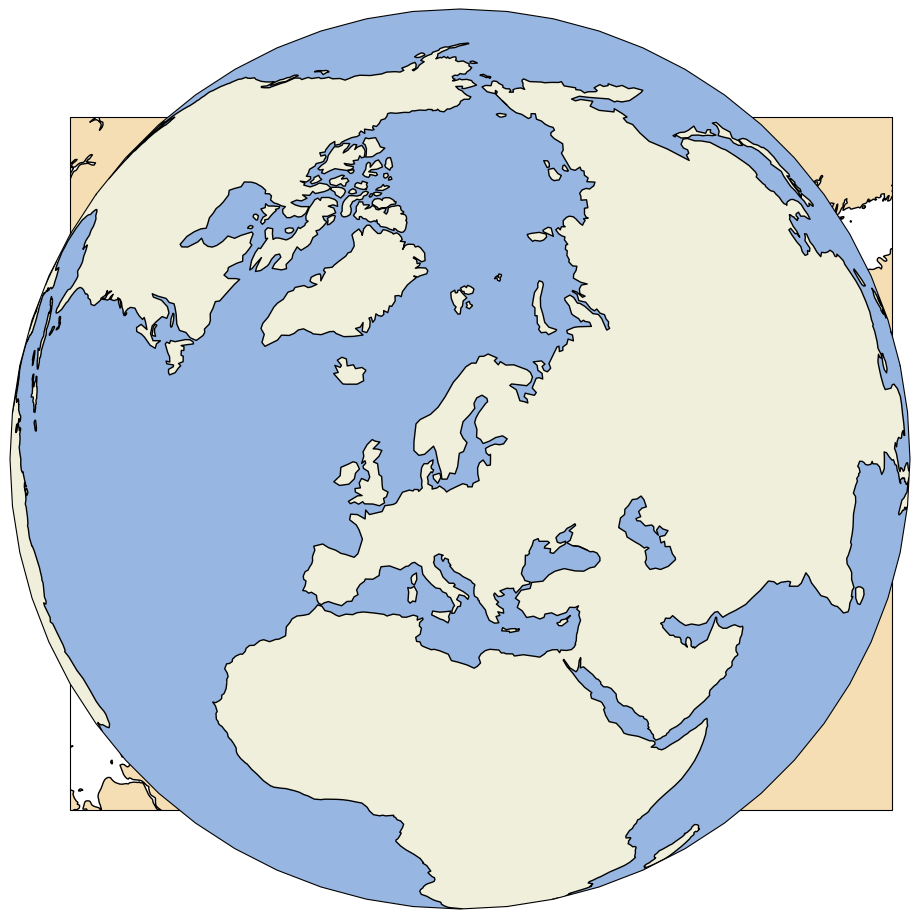

In [6]:
pc = cartopy.crs.PlateCarree()
coord = cartopy.crs.AzimuthalEquidistant(
    central_longitude=np.mean((W_lim, E_lim)),
    central_latitude=np.mean((S_lim, N_lim)))

#coord = cartopy.crs.Orthographic(
#    central_longitude=np.mean((W_lim, E_lim)),
#    central_latitude=np.mean((S_lim, N_lim)))

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=[17,9])
ax0 = fig.add_subplot(projection=coord)

feature = cartopy.feature.NaturalEarthFeature(name='land', category='physical',
                                       scale='10m', edgecolor='black', facecolor='wheat',
                                       zorder=1)
#gs = fig.add_gridspec(nrows=10, ncols=10, hspace=0.5, wspace=1)
ax0.add_feature(feature)
ax0.set_extent([
dictionaries.W_lim,
dictionaries.E_lim,
dictionaries.S_lim,
dictionaries.N_lim,
])

W_lim_detail = 14
E_lim_detail = 17
S_lim_detail = 54.5 
N_lim_detail = 55.5
lons = np.r_[np.linspace(W_lim_detail, W_lim_detail, nvert),
             np.linspace(W_lim_detail, E_lim_detail, nvert),
             np.linspace(E_lim_detail, E_lim_detail, nvert)].tolist()
lats = np.r_[np.linspace(S_lim_detail, N_lim_detail, nvert),
             np.linspace(N_lim_detail, N_lim_detail, nvert),
             np.linspace(N_lim_detail, S_lim_detail, nvert)].tolist()

ring = LinearRing(list(zip(lons, lats)))
ax0.add_geometries([ring], ccrs.PlateCarree(),
                   facecolor='none', edgecolor='tab:blue', linewidth=3, zorder=100)


# EUROPE INSET
inset_x = 1
inset_y = 1
inset_size = 0.2

ax2 = plt.axes([0, 0, 1, 1], projection=ccrs.Orthographic(
    central_latitude=58,
    central_longitude=17))
ax2.set_global()
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.COASTLINE)

ip = InsetPosition(ax, [0.7,0.55,0.4,0.4])
ax2.set_axes_locator(ip)

nvert = 100
lons = np.r_[np.linspace(dictionaries.W_lim, dictionaries.W_lim, nvert),
             np.linspace(dictionaries.W_lim, dictionaries.E_lim, nvert),
             np.linspace(dictionaries.E_lim, dictionaries.E_lim, nvert)].tolist()
lats = np.r_[np.linspace(dictionaries.S_lim, dictionaries.N_lim, nvert),
             np.linspace(dictionaries.N_lim, dictionaries.N_lim, nvert),
             np.linspace(dictionaries.N_lim, dictionaries.S_lim, nvert)].tolist()

ring = LinearRing(list(zip(lons, lats)))
ax2.add_geometries([ring], ccrs.PlateCarree(),
                   facecolor='none', edgecolor='red', linewidth=0.75)
ax2.set_extent([-10, 80, 30, 70], crs=ccrs.PlateCarree())
# END EUROPE INSET

# LEAKS DETAIL INSET
inset_x = 1
inset_y = 1
inset_size = 0.2

ax3 = plt.axes([0, 0, 1, 1], projection=ccrs.Orthographic(
    central_latitude=58,
    central_longitude=17))
ax3.set_global()
ax3.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.OCEAN)
ax3.add_feature(cfeature.COASTLINE)

ip = InsetPosition(ax, [0.7,0.1,0.4,0.4])
ax3.set_axes_locator(ip)

nvert = 100
lons = np.r_[np.linspace(dictionaries.W_lim, dictionaries.W_lim, nvert),
             np.linspace(dictionaries.W_lim, dictionaries.E_lim, nvert),
             np.linspace(dictionaries.E_lim, dictionaries.E_lim, nvert)].tolist()
lats = np.r_[np.linspace(dictionaries.S_lim, dictionaries.N_lim, nvert),
             np.linspace(dictionaries.N_lim, dictionaries.N_lim, nvert),
             np.linspace(dictionaries.N_lim, dictionaries.S_lim, nvert)].tolist()

ring = LinearRing(list(zip(lons, lats)))
ax3.add_geometries([ring], ccrs.PlateCarree(),
                   facecolor='none', edgecolor='red', linewidth=3)
ax3.set_extent([W_lim_detail,
E_lim_detail,
S_lim_detail, 
N_lim_detail,], crs=ccrs.PlateCarree())

leak1 = dictionaries.leak1
leak2 = dictionaries.leak2
leak3 = dictionaries.leak3
leak4 = dictionaries.leak4

for leak in [leak1, leak2, leak3, leak4]:
    ax.scatter(leak['lon'], leak['lat'], color='orange', transform=pc, s=150, zorder=20,
                edgecolor='k', marker="X")
# END LEAKS DETAIL INSET
    
ax0.tick_params(color='red', labelcolor='red')
for spine in ax0.spines.values():
    spine.set_edgecolor('red')
    spine.set_linewidth(5)

ax3.tick_params(color='tab:blue', labelcolor='red')
for spine in ax3.spines.values():
    spine.set_edgecolor('tab:blue')
    spine.set_linewidth(5)

In [8]:
nordex

,Cruise,Type,Station,Cast,Date,Time,Latitude,Longitude,Bottle,Identifier,...,CH3CHICH3,CH2=CCl3,CH2Br2,CHBrCl2,CH2ClI,CCl2=CCl2,CHBr2Cl,CH2BrI,CHBr3,CH2I2
0,NORTHEX,B,1,1,2022-10-03,03:57:12,55.20766,14.31952,1,513700,...,NaN,NaN,12.285102,1.620475,0.780619,2.751863,1.743793,NaN,43.588484,1.869037
1,NORTHEX,B,1,1,2022-10-03,03:59:01,55.20766,14.31952,3,513702,...,NaN,8.280569,2.727551,2.731629,1.024993,4.287328,1.282584,0.746015,12.029184,2.218074
2,NORTHEX,B,1,1,2022-10-03,04:00:54,55.20766,14.31952,5,513704,...,NaN,6.738366,1.573310,1.557624,4.985850,2.862099,0.845049,0.714861,10.492364,10.955343
3,NORTHEX,B,1,1,2022-10-03,04:03:00,55.20766,14.31952,7,513706,...,NaN,6.635327,1.037304,2.304627,3.999292,3.767961,1.171414,0.420449,10.035696,11.403672
4,NORTHEX,B,2,1,2022-10-03,07:08:26,55.37284,14.54914,1,513709,...,NaN,NaN,11.394959,1.332050,1.064891,1.899691,1.434644,0.271769,40.301814,2.925159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,NORTHEX,B,20,1,2022-10-05,13:38:33,55.70034,15.21400,3,513951,...,NaN,4.500244,8.522498,0.530306,2.015803,1.512503,0.355562,3.604903,26.146793,6.780313
129,NORTHEX,B,20,1,2022-10-05,13:40:14,55.70034,15.21400,5,513953,...,NaN,NaN,3.822862,0.530606,1.697977,1.235916,0.163870,1.137471,17.286823,4.001318
130,NORTHEX,B,20,1,2022-10-05,13:42:02,55.70034,15.21400,7,513955,...,NaN,NaN,3.535235,0.669557,2.620303,1.250692,0.246972,0.717173,19.452517,7.825319
131,NORTHEX,B,20,1,2022-10-05,13:43:59,55.70034,15.21400,9,513957,...,NaN,NaN,0.813423,0.523369,5.660811,0.809234,0.108663,0.337766,12.665767,18.868302


In [19]:
nordex = nordex[['Latitude', 'Longitude', 'Station', 'Cast']]#.groupby('Station').mean()['Longitude']
nordex.groupby('Station').mean()

,Latitude,Longitude,Cast
Station,,,
1,55.20766,14.31952,1.0
2,55.37284,14.54914,1.0
3,55.53454,14.79376,1.0
4,55.69532,15.03994,1.0
5,55.65278,15.28230,1.0
6,55.60718,15.53782,1.0
7,55.67798,15.74336,1.0
8,55.52986,15.95782,1.0
9,55.62700,15.90516,1.0


AttributeError: 'NoneType' object has no attribute 'set_ylim'

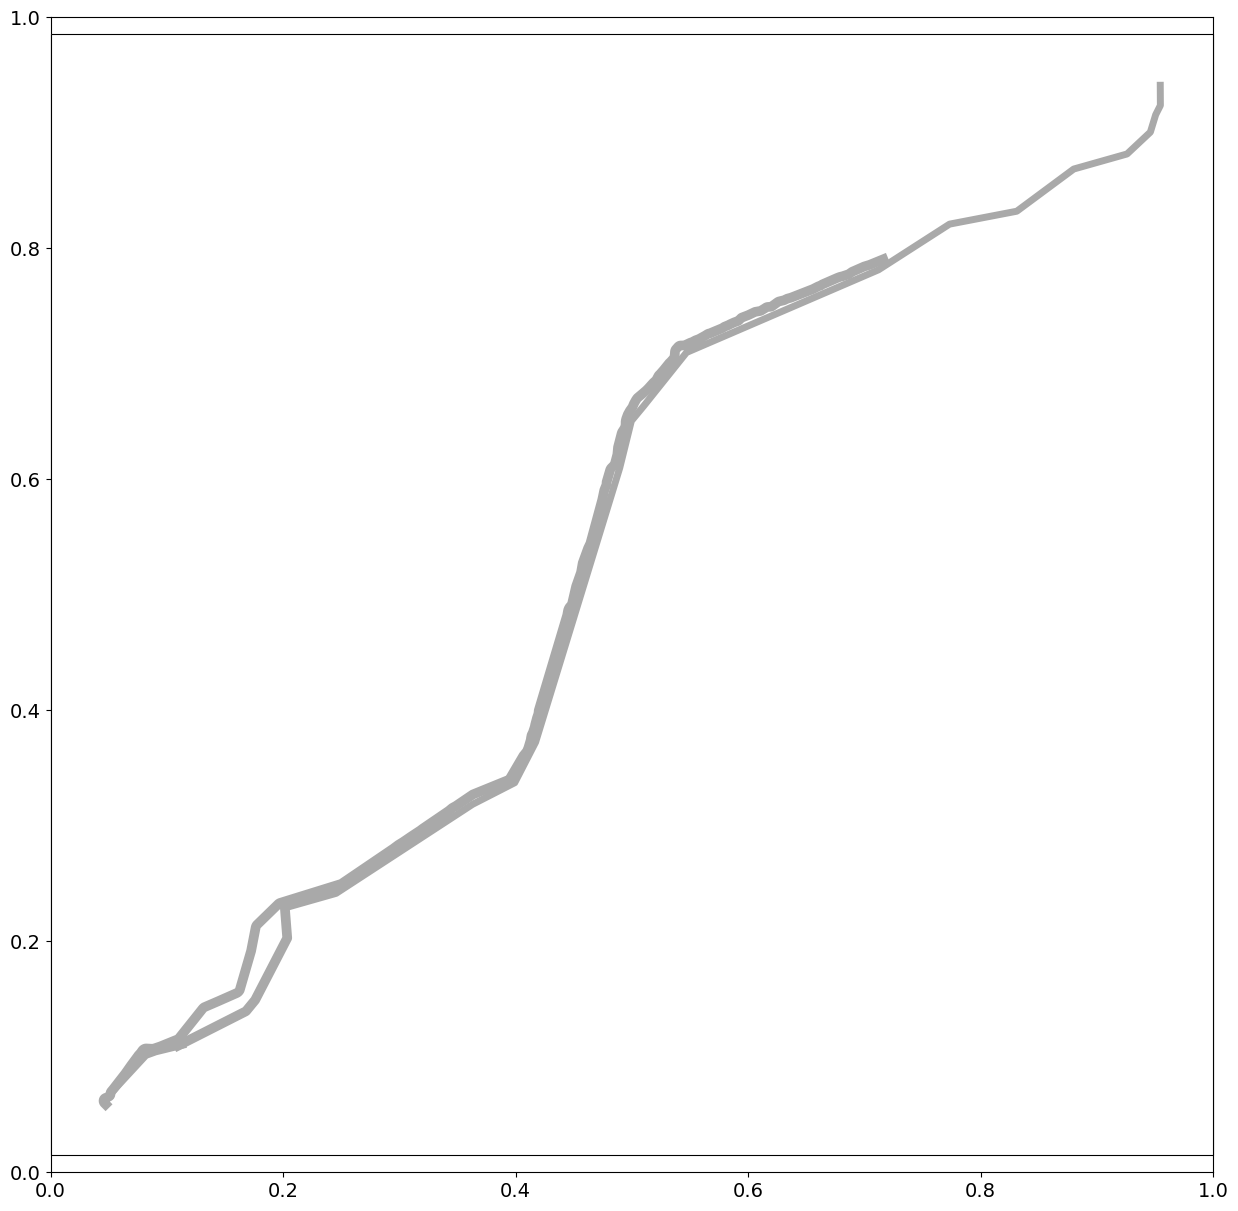

In [30]:
import importlib
importlib.reload(mapplotting)
fig, ax = plt.subplots(figsize=[15,15])
pc = cartopy.crs.PlateCarree()
coord = cartopy.crs.AzimuthalEquidistant(
    central_longitude=np.mean((W_lim, E_lim)),
    central_latitude=np.mean((S_lim, N_lim)))

#coord = cartopy.crs.Orthographic(
#    central_longitude=np.mean((W_lim, E_lim)),
#    central_latitude=np.mean((S_lim, N_lim)))

# plt.rcParams.update({'font.size': 14})
#fig = plt.figure(figsize=[17,9])
ax0 = fig.add_subplot(projection=coord)
ax0 = mapplotting.plot_pipelines(ax0)
ax0.
#plt.xlim(0,0.2)

In [33]:
dictionaries.leak1

{'lat': 54.876667,
 'lon': 15.41,
 'starttime': datetime.datetime(2022, 9, 26, 2, 0)}

In [34]:
dictionaries.leak2

{'lat': 55.535,
 'lon': 15.698333,
 'starttime': datetime.datetime(2022, 9, 26, 19, 0)}

In [36]:
dictionaries.leak3

{'lat': 55.556667,
 'lon': 15.788333,
 'starttime': datetime.datetime(2022, 9, 26, 19, 0)}

In [40]:
dictionaries.leak4['lon'] = dictionaries.leak4['lon']+0.01

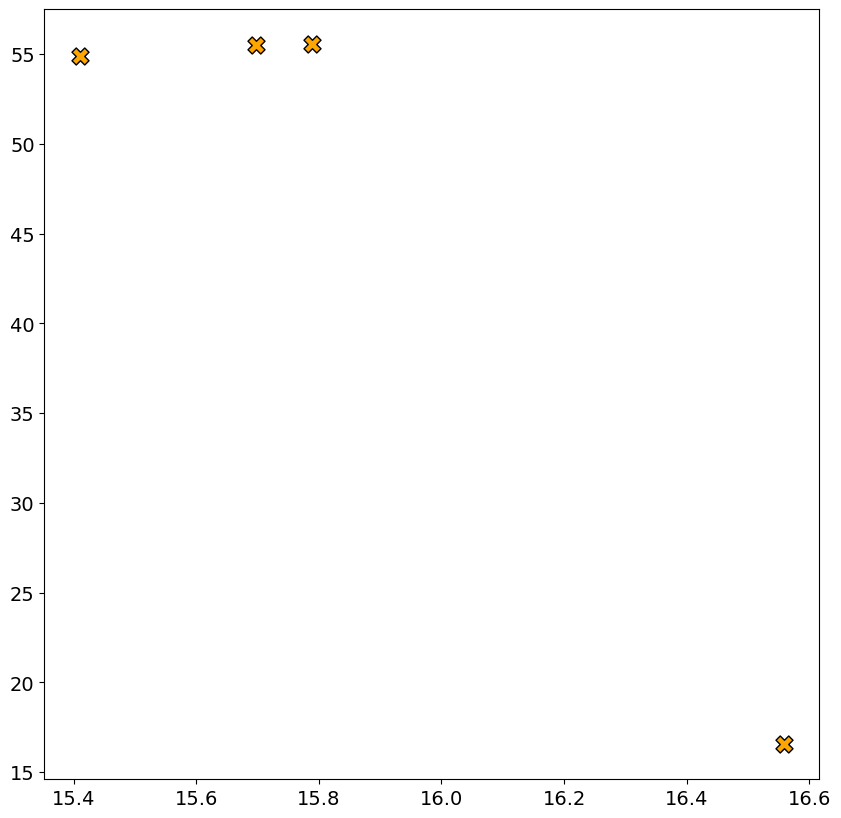

In [51]:
fig, ax = plt.subplots(figsize=[10,10])
dictionaries.leak4['lon'] = dictionaries.leak4['lon']+0.11
dictionaries.leak4['lat'] = dictionaries.leak4['lat']+0.11
leak1 = dictionaries.leak1
leak2 = dictionaries.leak2
leak3 = dictionaries.leak3
leak4 = dictionaries.leak4

for leak in [leak1, leak2, leak3, leak4]:
    ax.scatter(leak['lon'], leak['lat'], color='orange', s=150, zorder=20,
                edgecolor='k', marker="X")

In [3]:
dictionaries.leak3

{'lat': 55.556667,
 'lon': 15.788333,
 'starttime': datetime.datetime(2022, 9, 26, 19, 0)}

In [4]:
dictionaries.leak4

{'lat': 55.567499999999995,
 'lon': 15.789,
 'starttime': datetime.datetime(2022, 9, 26, 19, 0)}